In [ ]:
# By Saransh Rajpurohit

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
#Creating Dataframe

In [ ]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
df.shape

(13320, 9)

In [ ]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [ ]:
def print_unique_values(df):
  for column in df:
    if df[column].dtypes == 'object':
      print(f'{column} :  {df[column].unique()}')

In [ ]:
# Printing unique values of each column

In [ ]:
print_unique_values(df)

area_type :  ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
availability :  ['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul']
location :  ['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur ex

In [ ]:
df['society'].value_counts()

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: society, Length: 2688, dtype: int64

In [ ]:
# Most houses are in GrrvaGr society

In [ ]:
# As there are too many societies using location instead

In [ ]:
df1=df.drop([ 'society'] , axis='columns')

In [ ]:
# Removing society

In [ ]:
df2 = df1.dropna()   #Dropped all samples with null values

In [ ]:
df2['size'] = df2['size'].apply(lambda x : int(x[0]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# Making size an integer

In [ ]:
df2.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,1200,2.0,1.0,51.00


In [ ]:
def convert_total_sqft(x):
    try:
      if len(x.split('-')) > 1:
        return (float(x.split('-')[0]) + float(x.split('-')[1]))/2
      else:
        return float(x)
    except:
      return 0

In [ ]:
df2['total_sqft'] = df2['total_sqft'].apply(convert_total_sqft)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# Making total_sqft float value

In [ ]:
df3 = df2[df2['total_sqft'] != 0]

In [ ]:
#Removing the samples where total_sqft value is 0

In [ ]:
def convert_availability(x):
    
      if x=="Ready To Move" or x=="Immediate Possession":
        return "Ready to Move"
      else:
        return "Not ready to move "
   

In [ ]:
df3['availability'] = df3['availability'].apply(convert_availability)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# Applying convert_availability on availability 

In [ ]:
df3.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Not ready to move,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
1,Plot Area,Ready to Move,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready to Move,Uttarahalli,3,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready to Move,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready to Move,Kothanur,2,1200.0,2.0,1.0,51.00


In [ ]:
df3.describe()

,size,total_sqft,bath,balcony,price
count,12668.000000,12668.000000,12668.000000,12668.000000,12668.000000
mean,2.724029,1511.835167,2.616277,1.585649,105.952648
std,1.104660,1162.097276,1.223882,0.816758,131.813137
min,1.000000,5.000000,1.000000,0.000000,8.000000
25%,2.000000,1100.000000,2.000000,1.000000,49.015000
50%,3.000000,1260.000000,2.000000,2.000000,70.000000
75%,3.000000,1640.000000,3.000000,2.000000,115.000000
max,9.000000,52272.000000,40.000000,3.000000,2912.000000


In [ ]:
df3.shape

(12668, 8)

In [ ]:
loc_count = df3['location'].value_counts()
loc_count

Whitefield           513
Sarjapur  Road       372
Electronic City      300
Kanakpura Road       259
Thanisandra          230
                    ... 
S R Layout             1
Meenakshi Layout       1
Vidyapeeta             1
Maruthi Extension      1
Abshot Layout          1
Name: location, Length: 1259, dtype: int64

In [ ]:
# Most houses are at Whitefield location

In [ ]:
loc_count_more_then_50 = loc_count[loc_count >= 50]
loc_count_more_then_50

Whitefield                  513
Sarjapur  Road              372
Electronic City             300
Kanakpura Road              259
Thanisandra                 230
Yelahanka                   206
Uttarahalli                 186
Hebbal                      173
Raja Rajeshwari Nagar       168
Marathahalli                164
7th Phase JP Nagar          146
Bannerghatta Road           144
Hennur Road                 142
Haralur Road                135
Electronic City Phase II    130
Rajaji Nagar                 99
Chandapura                   98
Bellandur                    91
Electronics City Phase 1     86
Hoodi                        86
KR Puram                     85
Begur Road                   83
Sarjapur                     80
Yeshwanthpur                 78
Kasavanhalli                 77
Harlur                       76
Banashankari                 74
Ramamurthy Nagar             71
Hormavu                      71
Kengeri                      70
Koramangala                  69
Hosa Roa

In [ ]:
df4 = df3[df3['location'].apply(lambda x : x in loc_count_more_then_50)]
df4.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Not ready to move,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
2,Built-up Area,Ready to Move,Uttarahalli,3,1440.0,2.0,3.0,62.00
4,Super built-up Area,Ready to Move,Kothanur,2,1200.0,2.0,1.0,51.00
5,Super built-up Area,Ready to Move,Whitefield,2,1170.0,2.0,1.0,38.00
8,Super built-up Area,Ready to Move,Marathahalli,3,1310.0,3.0,1.0,63.25


In [ ]:
# Using only those locations with value count grater than or equal to 50

In [ ]:
df4['PPS'] = (df4['price'] * 100000) / df4['total_sqft']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# PPS created to compare location price per total_sqft

In [ ]:
df4.groupby('location')['PPS'].aggregate(['min','max'])

,min,max
location,,
7th Phase JP Nagar,3465.346535,16666.666667
8th Phase JP Nagar,3181.818182,22500.000000
Akshaya Nagar,3200.000000,11347.517730
Banashankari,2999.163180,20833.333333
Bannerghatta Road,3034.482759,15933.333333
Begur Road,2783.505155,15000.000000
Bellandur,2922.077922,14285.714286
Bisuvanahalli,2883.720930,8372.093023
Budigere,3950.216450,11250.000000


In [ ]:
# Whitefield has very high maximum PPS thus it contains many outliers

In [ ]:
df4.shape

(5677, 9)

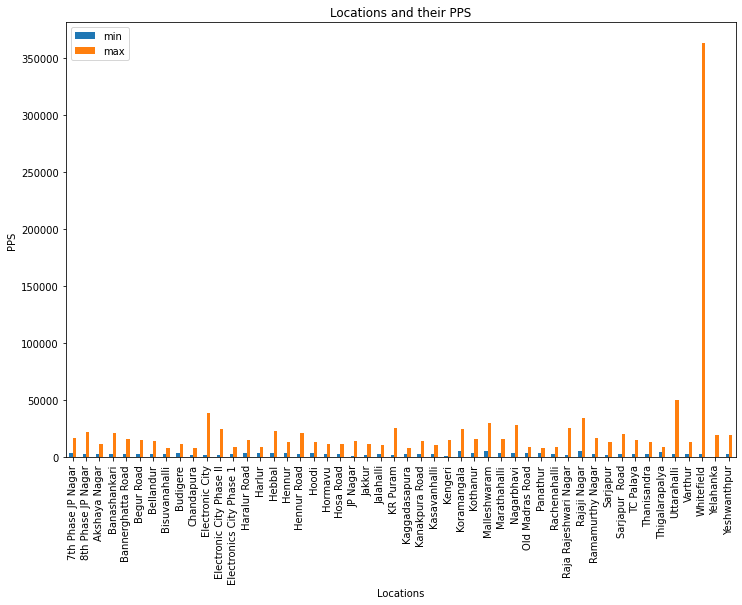

In [ ]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(12,8))
aax=fig.gca()
df4.groupby('location')['PPS'].aggregate(['min','max']).plot.bar(ax=aax)
aax.set_title('Locations and their PPS')
aax.set_xlabel('Locations')
aax.set_ylabel('PPS')
plt.show()

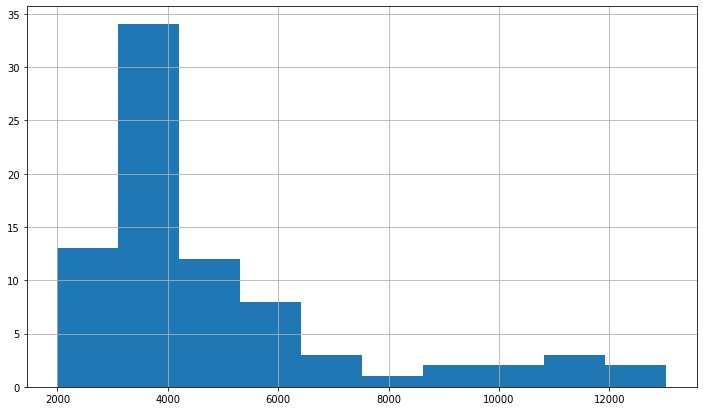

In [ ]:
df4[df4['location'] == 'Sarjapur'].PPS.hist(figsize=(12,7))


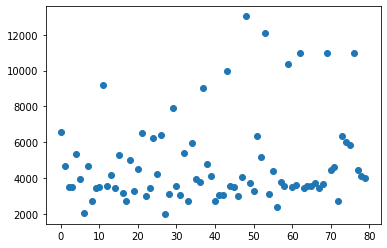

In [ ]:


plt.scatter(range(len(df4[df4['location'] == 'Sarjapur'])) , df4[df4['location'] == 'Sarjapur'].PPS)

plt.show()

In [ ]:
df5 = pd.DataFrame()

for loc,dfloc in df4.groupby('location'):
  m = dfloc['PPS'].mean()
  s = dfloc['PPS'].std()

  extracted_df = dfloc[(dfloc['PPS'] >= (m - 2 * s)) & (dfloc['PPS'] <= (m + 2 * s))]
  df5 = pd.concat([df5,extracted_df] , ignore_index=True)


In [ ]:
# Removing Outliers

In [ ]:
df5["availability"].value_counts()

Ready to Move         3957
Not ready to move     1503
Name: availability, dtype: int64

In [ ]:
df5

,area_type,availability,location,size,total_sqft,bath,balcony,price,PPS
0,Super built-up Area,Ready to Move,7th Phase JP Nagar,2,1000.0,2.0,1.0,38.00,3800.000000
1,Built-up Area,Ready to Move,7th Phase JP Nagar,2,1080.0,2.0,2.0,72.00,6666.666667
2,Super built-up Area,Ready to Move,7th Phase JP Nagar,2,1270.0,2.0,2.0,93.00,7322.834646
3,Built-up Area,Ready to Move,7th Phase JP Nagar,3,1420.0,2.0,1.0,100.00,7042.253521
4,Built-up Area,Ready to Move,7th Phase JP Nagar,3,1850.0,3.0,1.0,150.00,8108.108108
...,...,...,...,...,...,...,...,...,...
5455,Super built-up Area,Ready to Move,Yeshwanthpur,3,2500.0,3.0,3.0,138.00,5520.000000
5456,Super built-up Area,Ready to Move,Yeshwanthpur,2,1160.0,2.0,2.0,64.08,5524.137931
5457,Super built-up Area,Ready to Move,Yeshwanthpur,3,2503.0,3.0,3.0,138.00,5513.383939
5458,Super built-up Area,Ready to Move,Yeshwanthpur,3,1855.0,3.0,3.0,135.00,7277.628032


In [ ]:
df5.groupby('location')['PPS'].aggregate(['min','max'])

,min,max
location,,
7th Phase JP Nagar,3465.346535,11333.333333
8th Phase JP Nagar,3181.818182,13684.210526
Akshaya Nagar,3200.000000,8491.023775
Banashankari,2999.163180,15000.000000
Bannerghatta Road,3034.482759,8468.834688
Begur Road,2783.505155,6793.145655
Bellandur,2922.077922,8627.156789
Bisuvanahalli,2883.720930,5084.745763
Budigere,3950.216450,6371.191136


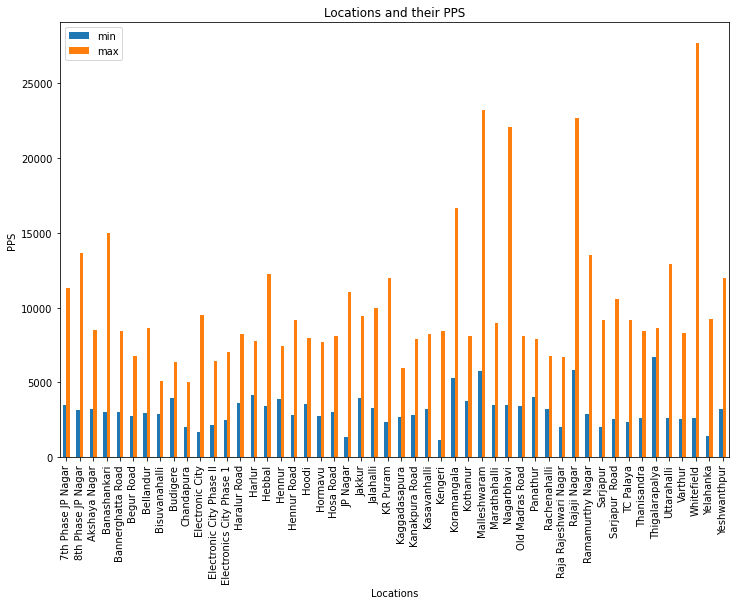

In [ ]:
fig=plt.figure(figsize=(12,8))
aax=fig.gca()
df5.groupby('location')['PPS'].aggregate(['min','max']).plot.bar(ax=aax)
aax.set_title('Locations and their PPS')
aax.set_xlabel('Locations')
aax.set_ylabel('PPS')
plt.show()

In [ ]:
# More uniform bar graph

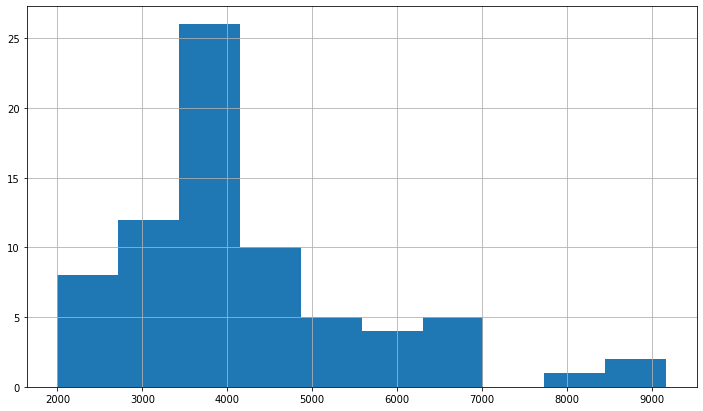

In [ ]:
df5[df5['location'] == 'Sarjapur'].PPS.hist(figsize=(12,7))


In [ ]:
# Histogram is now more smoother

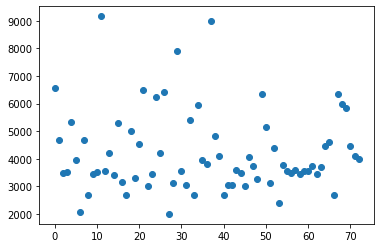

In [ ]:


plt.scatter(range(len(df5[df5['location'] == 'Sarjapur'])) , df5[df5['location'] == 'Sarjapur'].PPS)

plt.show()

In [ ]:
# Graph is more uniform

In [ ]:
df5.describe()

,size,total_sqft,bath,balcony,price,PPS
count,5460.000000,5460.000000,5460.000000,5460.000000,5460.000000,5460.000000
mean,2.550000,1474.759865,2.458059,1.573626,89.270452,5613.867387
std,0.836666,758.221403,0.939788,0.781425,94.332799,2405.843356
min,1.000000,276.000000,1.000000,0.000000,9.000000,1166.666667
25%,2.000000,1115.000000,2.000000,1.000000,47.000000,4132.231405
50%,2.000000,1275.000000,2.000000,2.000000,65.280000,5172.016703
75%,3.000000,1620.000000,3.000000,2.000000,98.407500,6461.102325
max,9.000000,12000.000000,10.000000,3.000000,2200.000000,27692.307692


In [ ]:
df5.corr()

,size,total_sqft,bath,balcony,price,PPS
size,1.000000,0.654150,0.846961,0.261807,0.505515,0.337952
total_sqft,0.654150,1.000000,0.711528,0.239380,0.824695,0.355263
bath,0.846961,0.711528,1.000000,0.247038,0.579219,0.401003
balcony,0.261807,0.239380,0.247038,1.000000,0.186960,0.091653
price,0.505515,0.824695,0.579219,0.186960,1.000000,0.679996
PPS,0.337952,0.355263,0.401003,0.091653,0.679996,1.000000


In [ ]:
# Price increases greatly with total_sqft , increases with size,bath,PPS and slightly increase with balcony

In [ ]:
df6 = df5.drop('PPS' , axis='columns')

In [ ]:
# As PPS is no longer required

In [ ]:
df6['area_type'].value_counts()

Super built-up  Area    4257
Built-up  Area           855
Plot  Area               323
Carpet  Area              25
Name: area_type, dtype: int64

In [ ]:
# As number of houses having Super built-up  Area area type is significantly greater than other area types 

In [ ]:
def fix_area_type(x):
  if x != 'Super built-up  Area':
    return 'Others'
  else:
    return x

In [ ]:
df6['area_type'] = df6['area_type'].apply(fix_area_type)

In [ ]:
at = pd.get_dummies(df6['area_type'])
loc = pd.get_dummies(df6['location'])
avl = pd.get_dummies(df6['availability'])

In [ ]:
# Getting dummies for location,area_type,availability 

In [ ]:
df7 = pd.concat((df6,at,loc,avl) , axis=1)
df7.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,Others,Super built-up Area,...,TC Palaya,Thanisandra,Thigalarapalya,Uttarahalli,Varthur,Whitefield,Yelahanka,Yeshwanthpur,Not ready to move,Ready to Move
0,Super built-up Area,Ready to Move,7th Phase JP Nagar,2,1000.0,2.0,1.0,38.0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,Others,Ready to Move,7th Phase JP Nagar,2,1080.0,2.0,2.0,72.0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,Super built-up Area,Ready to Move,7th Phase JP Nagar,2,1270.0,2.0,2.0,93.0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,Others,Ready to Move,7th Phase JP Nagar,3,1420.0,2.0,1.0,100.0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,Others,Ready to Move,7th Phase JP Nagar,3,1850.0,3.0,1.0,150.0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df8 = df7.drop(['area_type', 'location','availability'] , axis=1)
df8.head()


,size,total_sqft,bath,balcony,price,Others,Super built-up Area,7th Phase JP Nagar,8th Phase JP Nagar,Akshaya Nagar,...,TC Palaya,Thanisandra,Thigalarapalya,Uttarahalli,Varthur,Whitefield,Yelahanka,Yeshwanthpur,Not ready to move,Ready to Move
0,2,1000.0,2.0,1.0,38.0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1080.0,2.0,2.0,72.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,1270.0,2.0,2.0,93.0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,1420.0,2.0,1.0,100.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,1850.0,3.0,1.0,150.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# As area_type, location and availability fields are not required any more

In [ ]:
X = df8.drop('price' , axis='columns')
Y = df8['price']

In [ ]:
# Creating features and targets

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y)

In [ ]:
from sklearn.linear_model import LinearRegression
lmodel = LinearRegression()

lmodel.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
# Creating Linear Model

In [ ]:
def predict_price(size,sqft,bath,balcony,area,loc):
  input = np.zeros(len(xtrain.columns))

  input[0] = size
  input[1] = sqft
  input[2] = bath
  input[3] = balcony

  input[np.where(xtrain.columns == area)[0][0]] = 1
  input[np.where(xtrain.columns == loc)[0][0]] = 1

  return (lmodel.predict([input]))


print(predict_price(3,1200,2,1,'Yelahanka','Super built-up  Area'))

[1.19190914e+11]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# Defining input function

In [ ]:
print('Training Accuarcy',lmodel.score(xtrain,ytrain))
print('Testing Accuarcy',lmodel.score(xtest,ytest))

Training Accuarcy 0.7724313366729192
Testing Accuarcy 0.7438410230902661


In [ ]:
ytrain_pred = lmodel.predict(xtrain)
abs(ytrain - ytrain_pred).mean()

21.226793750646497

In [ ]:
ytest_pred = lmodel.predict(xtest)
abs(ytest - ytest_pred).mean()


22.494957279163405

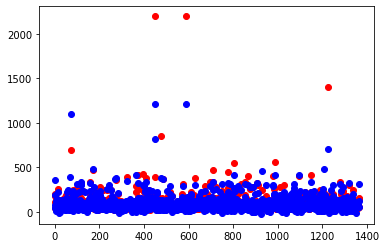

In [ ]:
import matplotlib.pyplot as plt


plt.scatter(range(len(xtest)) , ytest , color="r")

plt.scatter(range(len(xtest)) , ytest_pred , color="b")

plt.show()

In [ ]:
# Therefore most of the predictions are correct